In [780]:
import os
import glob
import yaml

import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl

import matplotlib as mpl

import plotting as putil
import dlc as dlc
import utils as util

import importlib

In [752]:
import os, sys
import shutil
import pickle
import datetime

import numpy as np
import class_reconstruct

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import zipfile

import cv2

In [781]:
%matplotlib notebook

In [782]:
#rootdir = '/mnt/minerva/courtship-free-behavior/maDLCv2' #maDLCv2'
rootdir = '/Users/julianarhee/DeepLabCut'
# projectname = 'projector-1dot-jyr-2024-02-18'
projectname = '38mm-dyad-jyr-2024-02-23'
project_dir = os.path.join(rootdir, projectname) 
# load config file
cfg_fpath = os.path.join(project_dir, 'config.yaml')
with open(cfg_fpath, "r") as f:
    cfg = yaml.load(f, Loader=yaml.SafeLoader)

In [786]:
# analyzed_dir = os.path.join(project_dir, 'analyzed')
srcdir = '/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut'
analyzed_dir = os.path.join(srcdir, projectname)
print(analyzed_dir)
analyzed_files = glob.glob(os.path.join(analyzed_dir, '*_el.h5'))
print('Found {} analyzed vids.'.format(len(analyzed_files)))

/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/38mm-dyad-jyr-2024-02-23
Found 12 analyzed vids.


In [787]:
for i, v in enumerate(analyzed_files):
    print(i, os.path.split(v)[-1])

0 20240125-0956-fly1-yakWT_3do_sh_yakWT_3do_gh_09_56_32MJPG-0003DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
1 20231223-1117_fly1_eleWT_5do_sh_eleWT_5do_gh_11_19_05MJPG-0003DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
2 20240118-1425-fly3-melWT_3do_sh_melWT_3do_gh_14_24_54MJPG-0001DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
3 20231213-1122_fly2_eleWT_5do_sh_eleWT_5do_gh_11_32_44MJPG-0001DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
4 20240122-1148-fly3-yakWT_3do_sh_yakWT_3do_gh_11_48_10MJPG-0002DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
5 20231227-1251_fly3_eleWT_5do_sh_eleWT_5do_gh_12_51_52MJPG-0006DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
6 20240112-1420-fly3-yakWT_3do_sh_yakWT_3do_ghDLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
7 20240119-1149-fly5-melWT_4do_sh_melWT_4do_gh_11_49_36MJPG-0004DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
8 20240112-1030-fly2-melWT_3do_sh_melWT_3do_ghDLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5
9 20240109

In [655]:
fps = 60  # Hz
max_jump=6
# ------------------------------
f1 = 'fly2'
f2 = 'fly1'
# ------------------------------
# yak: [2, 3, 7]
# mel: [0, 4, 9]
# ele: [1, 5, 6]

#### output dir

In [751]:
minerva_base = '/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut'
savedir = os.path.join(minerva_base, 'DeepLabCut_{}'.format(projectname), 'visual_transformations') #'analyzed')
if not os.path.exists(savedir):
    os.makedirs(savedir)
print(savedir)

/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/DeepLabCut_38mm-dyad-jyr-2024-02-23/visual_transformations


In [656]:
data_id

'20240119-1149-fly5-melWT_4do_sh_melWT_4do_gh_11_49_36MJPG-0004DLC_dlcrnetms5_38mm-dyadFeb23shuffle1_50000_el.h5'

In [750]:
fpath = analyzed_files[6]

data_id = os.path.split(fpath)[-1]
sess_id = data_id.split('DLC')[0]
sess_id.split('gh')[0]
sess_id = sess_id.split('gh_')[0] + 'gh'#'_'.join(sess_id.split('_')[0:-3])
print(sess_id)

if sess_id == '20240126-1023-fly2-melWT_4do_sh_melWT_4do_gh':
    cop_ix = 36400
elif sess_id == '20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh':
    cop_ix = 177300
elif sess_id == '20231223-1117_fly1_eleWT_5do_sh_eleWT_5do_gh':
    cop_ix = 55582
elif sess_id = '20240125-0956-fly1-yakWT_3do_sh_yakWT_3do_gh'
    cop_ix = 80000
elif sess_id = '20240112-1030-fly2-melWT_3do_sh_melWT_3do_gh':
    cop_ix = 40543
else:
    #sess_id == '20240118-1425-fly3-melWT_3do_sh_melWT_3do_gh':
    #sess_id = '20240119-1149-fly5-melWT_4do_sh_melWT_4do_gh':
    # sess_id = '20231227-1251_fly3_eleWT_5do_sh_eleWT_5do_gh'
#     sess_id = '20231213-1122_fly2_eleWT_5do_sh_eleWT_5do_gh'
    # sess_id = '20240122-1148-fly3-yakWT_3do_sh_yakWT_3do_gh'
    # sess_id = '20240112-1420-fly3-yakWT_3do_sh_yakWT_3do_gh' -- v little courting
    # sess_id = '20240116-1015-fly1-yakWT_4do_sh_yakWT_4do_gh'
    cop_ix = -1
    
trk = pd.read_hdf(fpath) #os.path.join(pathname, filename))
scorer = trk.columns.get_level_values(0)[0]
tstamp = np.linspace(0, len(trk) * 1 / fps, len(trk))
nframes = len(trk)

20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh


# Cowley

In [753]:
%matplotlib notebook

<IPython.core.display.Javascript object>


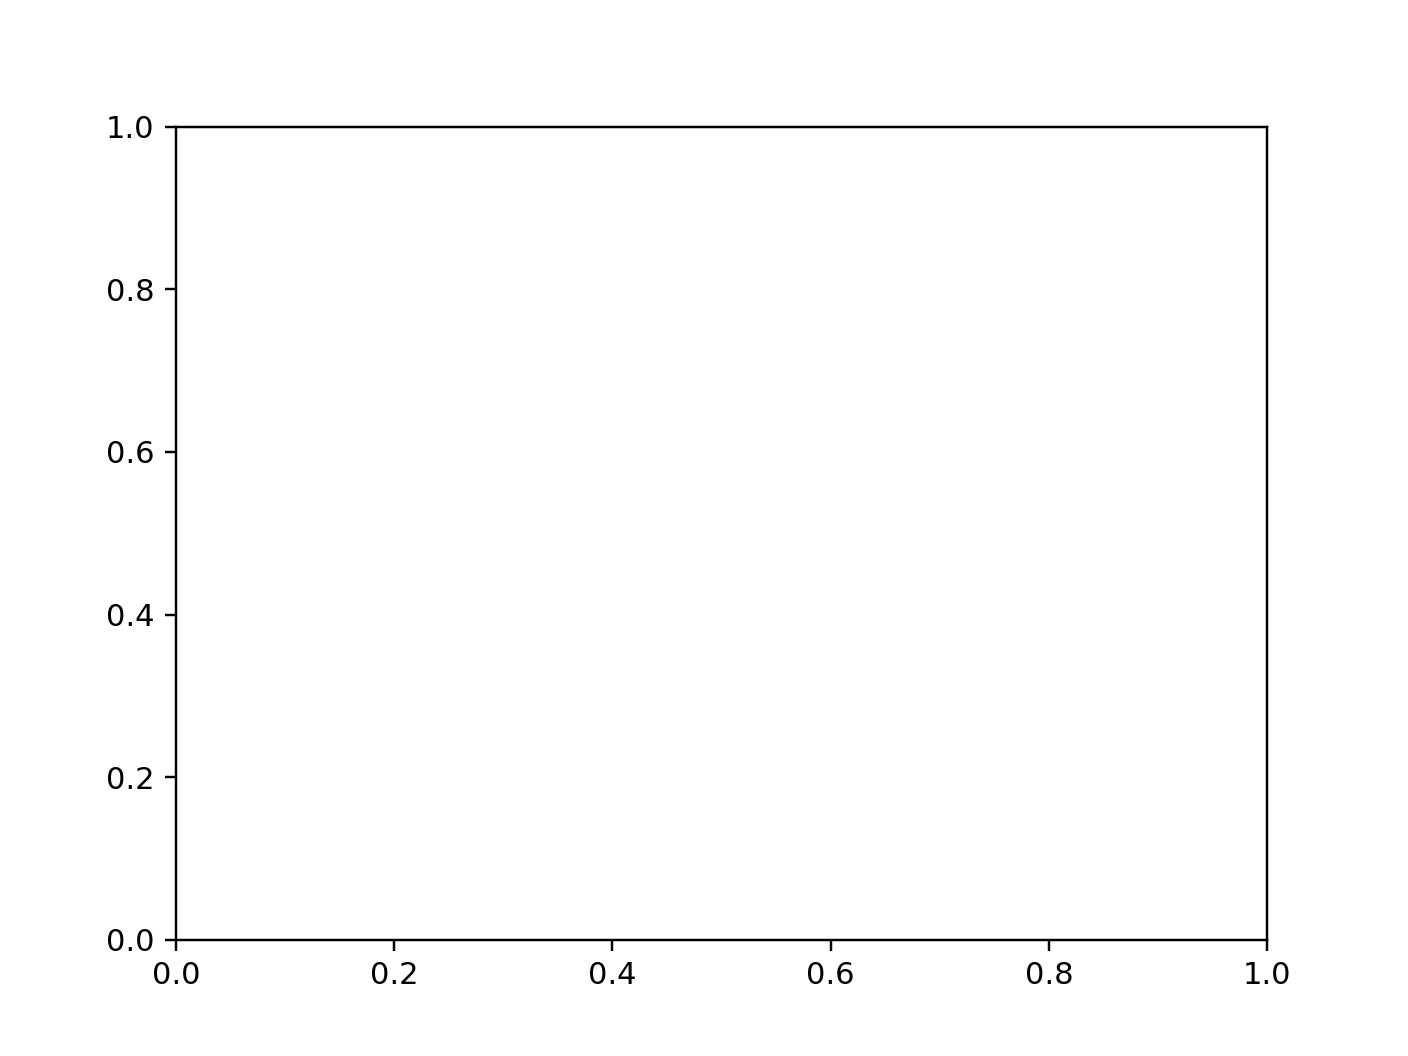

In [754]:
S = class_reconstruct.ReconstructStimulusClass()

In [756]:
fly1pos= trk.xs(f1, level='individuals', axis=1)
fly2pos = trk.xs(f2, level='individuals', axis=1)

if cop_ix == -1:
    cop_ix = len(fly1pos)
    
fly1pos = fly1pos.loc[0:cop_ix]
fly2pos = fly2pos.loc[0:cop_ix]

In [757]:
cop_ix

177300

In [758]:
# ifemale=0; imale=1;
# ix=0; iy=1;
ifly=0
ihead=0; ibody=1; itail=2;
pcutoff=0.99
xy_list = []
flybps = ['head', 'thorax', 'abdomentip']
#dotbps = ['left', 'center', 'right']

#processeddata_folder = './'
#positions = np.load(processeddata_folder + '{:s}/fly{:d}_tracks.npy'.format(LC_type, ifly))
    # fly_tracks need to be (2,2,3,T) for (female/male, x/y, head/body/tail, timepoint)

#positions_male = positions[imale,:,:,:]  # (2,3,T)
#positions_female = positions[ifemale,:,:,:]  # (2,3,T)
positions_male = dlc.dlc_to_multipos_array(fly1pos[scorer].copy(), bps=flybps, pcutoff=pcutoff)
positions_female = dlc.dlc_to_multipos_array(fly2pos[scorer].copy(), bps=flybps, pcutoff=pcutoff)

# compute relative position of female from male's head
diff_positions = positions_female - positions_male[:,ihead,:][:,np.newaxis,:]

num_frames = positions_male.shape[-1]

In [759]:
# make stimuli from male perspective
save_folder = savedir #os.path.join(savedir, sess_id)
tmp_figdir = os.path.join(save_folder, sess_id, 'tmpfigs')
if not os.path.exists(tmp_figdir):
    os.makedirs(tmp_figdir)
if not os.path.exists(os.path.join(save_folder, sess_id)):
    os.makedirs(os.path.join(save_folder, sess_id))
print(tmp_figdir)  

figdir = os.path.join(save_folder, sess_id)
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/DeepLabCut_38mm-dyad-jyr-2024-02-23/visual_transformations/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/tmpfigs


In [760]:
female_widths = np.zeros((num_frames,))
female_orientations = np.zeros((num_frames,))
female_lateral_positions = np.zeros((num_frames,))

for iframe in range(num_frames-1): 
#     if np.mod(iframe,10000) == 0:
#         print(iframe)
    female_widths[iframe], female_orientations[iframe], female_lateral_positions[iframe] = S.get_parameters_of_stripesmodel(positions_male[:,:,iframe].T, diff_positions[:,:,iframe].T)

# also save stimulus params in struct
P = {}
P['female_widths'] = female_widths[:-1]   # ignore last frame b/c no predictants for it
P['female_orientations'] = female_orientations[:-1]
P['female_lateral_positions'] = female_lateral_positions[:-1]

filename = os.path.join(save_folder, '{:s}/stimulus_params_fly{:d}.pkl'.format(sess_id, ifly))
pickle.dump(P, open(filename, 'wb'))

/Users/julianarhee/Repositories/flytracker-analysis/class_reconstruct.py:202: RuntimeWarning: invalid value encountered in cast
  angle = np.round(angle).astype(int)


## compare frames

In [761]:
#movie_fmt = 'avi'
# video_fpath = glob.glob('/Volumes/*/*projector*/20*/*/{}*.avi'.format(sess_id))[0]
try: 
    vidsrc = '/Volumes/Julie/courtship-videos/38mm_dyad'
    found_vids = glob.glob(os.path.join(vidsrc, sess_id, '*.avi'))
    assert len(found_vids)>0, "Checking alt. dir"
except AssertionError as e:
    print(e)
    vidsrc = '/Volumes/Giacomo/free_behavior_data'
    found_vids = glob.glob(os.path.join(vidsrc, sess_id, '*.avi'))
    print(found_vids)
video_fpath = found_vids[0]
print(video_fpath)

/Volumes/Julie/courtship-videos/38mm_dyad/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/10_41_48MJPG_trim-0001.avi


In [762]:
vidsrc = '/Volumes/Julie/courtship-videos/38mm_dyad'
glob.glob(os.path.join(vidsrc, sess_id, '*.avi'))

['/Volumes/Julie/courtship-videos/38mm_dyad/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/10_41_48MJPG_trim-0001.avi']

In [763]:
sess_id

'20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh'

In [764]:
#assert os.path.exists(video_fpath), "Could not find corresponding video: {}".format(video_fpath)
cap = cv2.VideoCapture(video_fpath)
# N frames should equal size of DCL df
n_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

frame_width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
print(frame_width, frame_height, n_frames) # array columns x array rows

[ WARN:0@171037.346] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@171037.346] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin13 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@171037.354] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@171037.354] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/

1200.0 1200.0 47716.0


In [765]:
import random

In [766]:
def plot_bodyparts_by_color(df, frame_ix, bodyparts2plot, colors, ax=None, pcutoff=0.9,
                    alpha=1.0, markersize=6):
    if ax is None:
        fig, ax = pl.subplots()
    for bpindex, (bp, col) in enumerate(zip(bodyparts2plot, colors)):
        prob = df.xs(
            (bp, "likelihood"), level=(-2, -1), axis=1
        ).values.squeeze()
        mask = prob < pcutoff # confident predictions have likelihood > pcutoff
        temp_x = np.ma.array(
            df.xs((bp, "x"), level=(-2, -1), axis=1).values.squeeze(),
            mask=mask)
        temp_y = np.ma.array(
            df.xs((bp, "y"), level=(-2, -1), axis=1).values.squeeze(),
            mask=mask)
        ax.plot(temp_x[frame_ix], temp_y[frame_ix], ".", color=col, 
                alpha=alpha, markersize=markersize)

In [767]:
bodyparts2plot = ['head', 'thorax', 'abdomentip']
colors = ['m', 'y', 'c']

In [768]:
# female_orientations[(female_orientations<=170) & (female_orientations>=150)]
#np.where((female_lateral_positions<=-0.4) & (female_lateral_positions>=-0.5)) #[0][0:20] #-0.3))
# curr_frames = np.where((female_lateral_positions>=-0.5) 
#                      & (female_lateral_positions<=-0.45))[0] # dot is on fly's right
# min_val = 0.6; max_val = 0.9; # left
# min_val = -0.9; max_val = -0.6; # right
# min_val = 0.4; max_val = 0.5; # orthog left
min_val = -0.1; max_val = 0.1; # in front
# min_val = -0.25; max_val = -0.2; # to right at ~45deg

curr_frames = np.where((female_lateral_positions>=min_val) 
                     & (female_lateral_positions<=max_val))[0]
#curr_frames = curr_frames[curr_frames<22500]
print(len(curr_frames))
random.shuffle(curr_frames)

12305


<IPython.core.display.Javascript object>


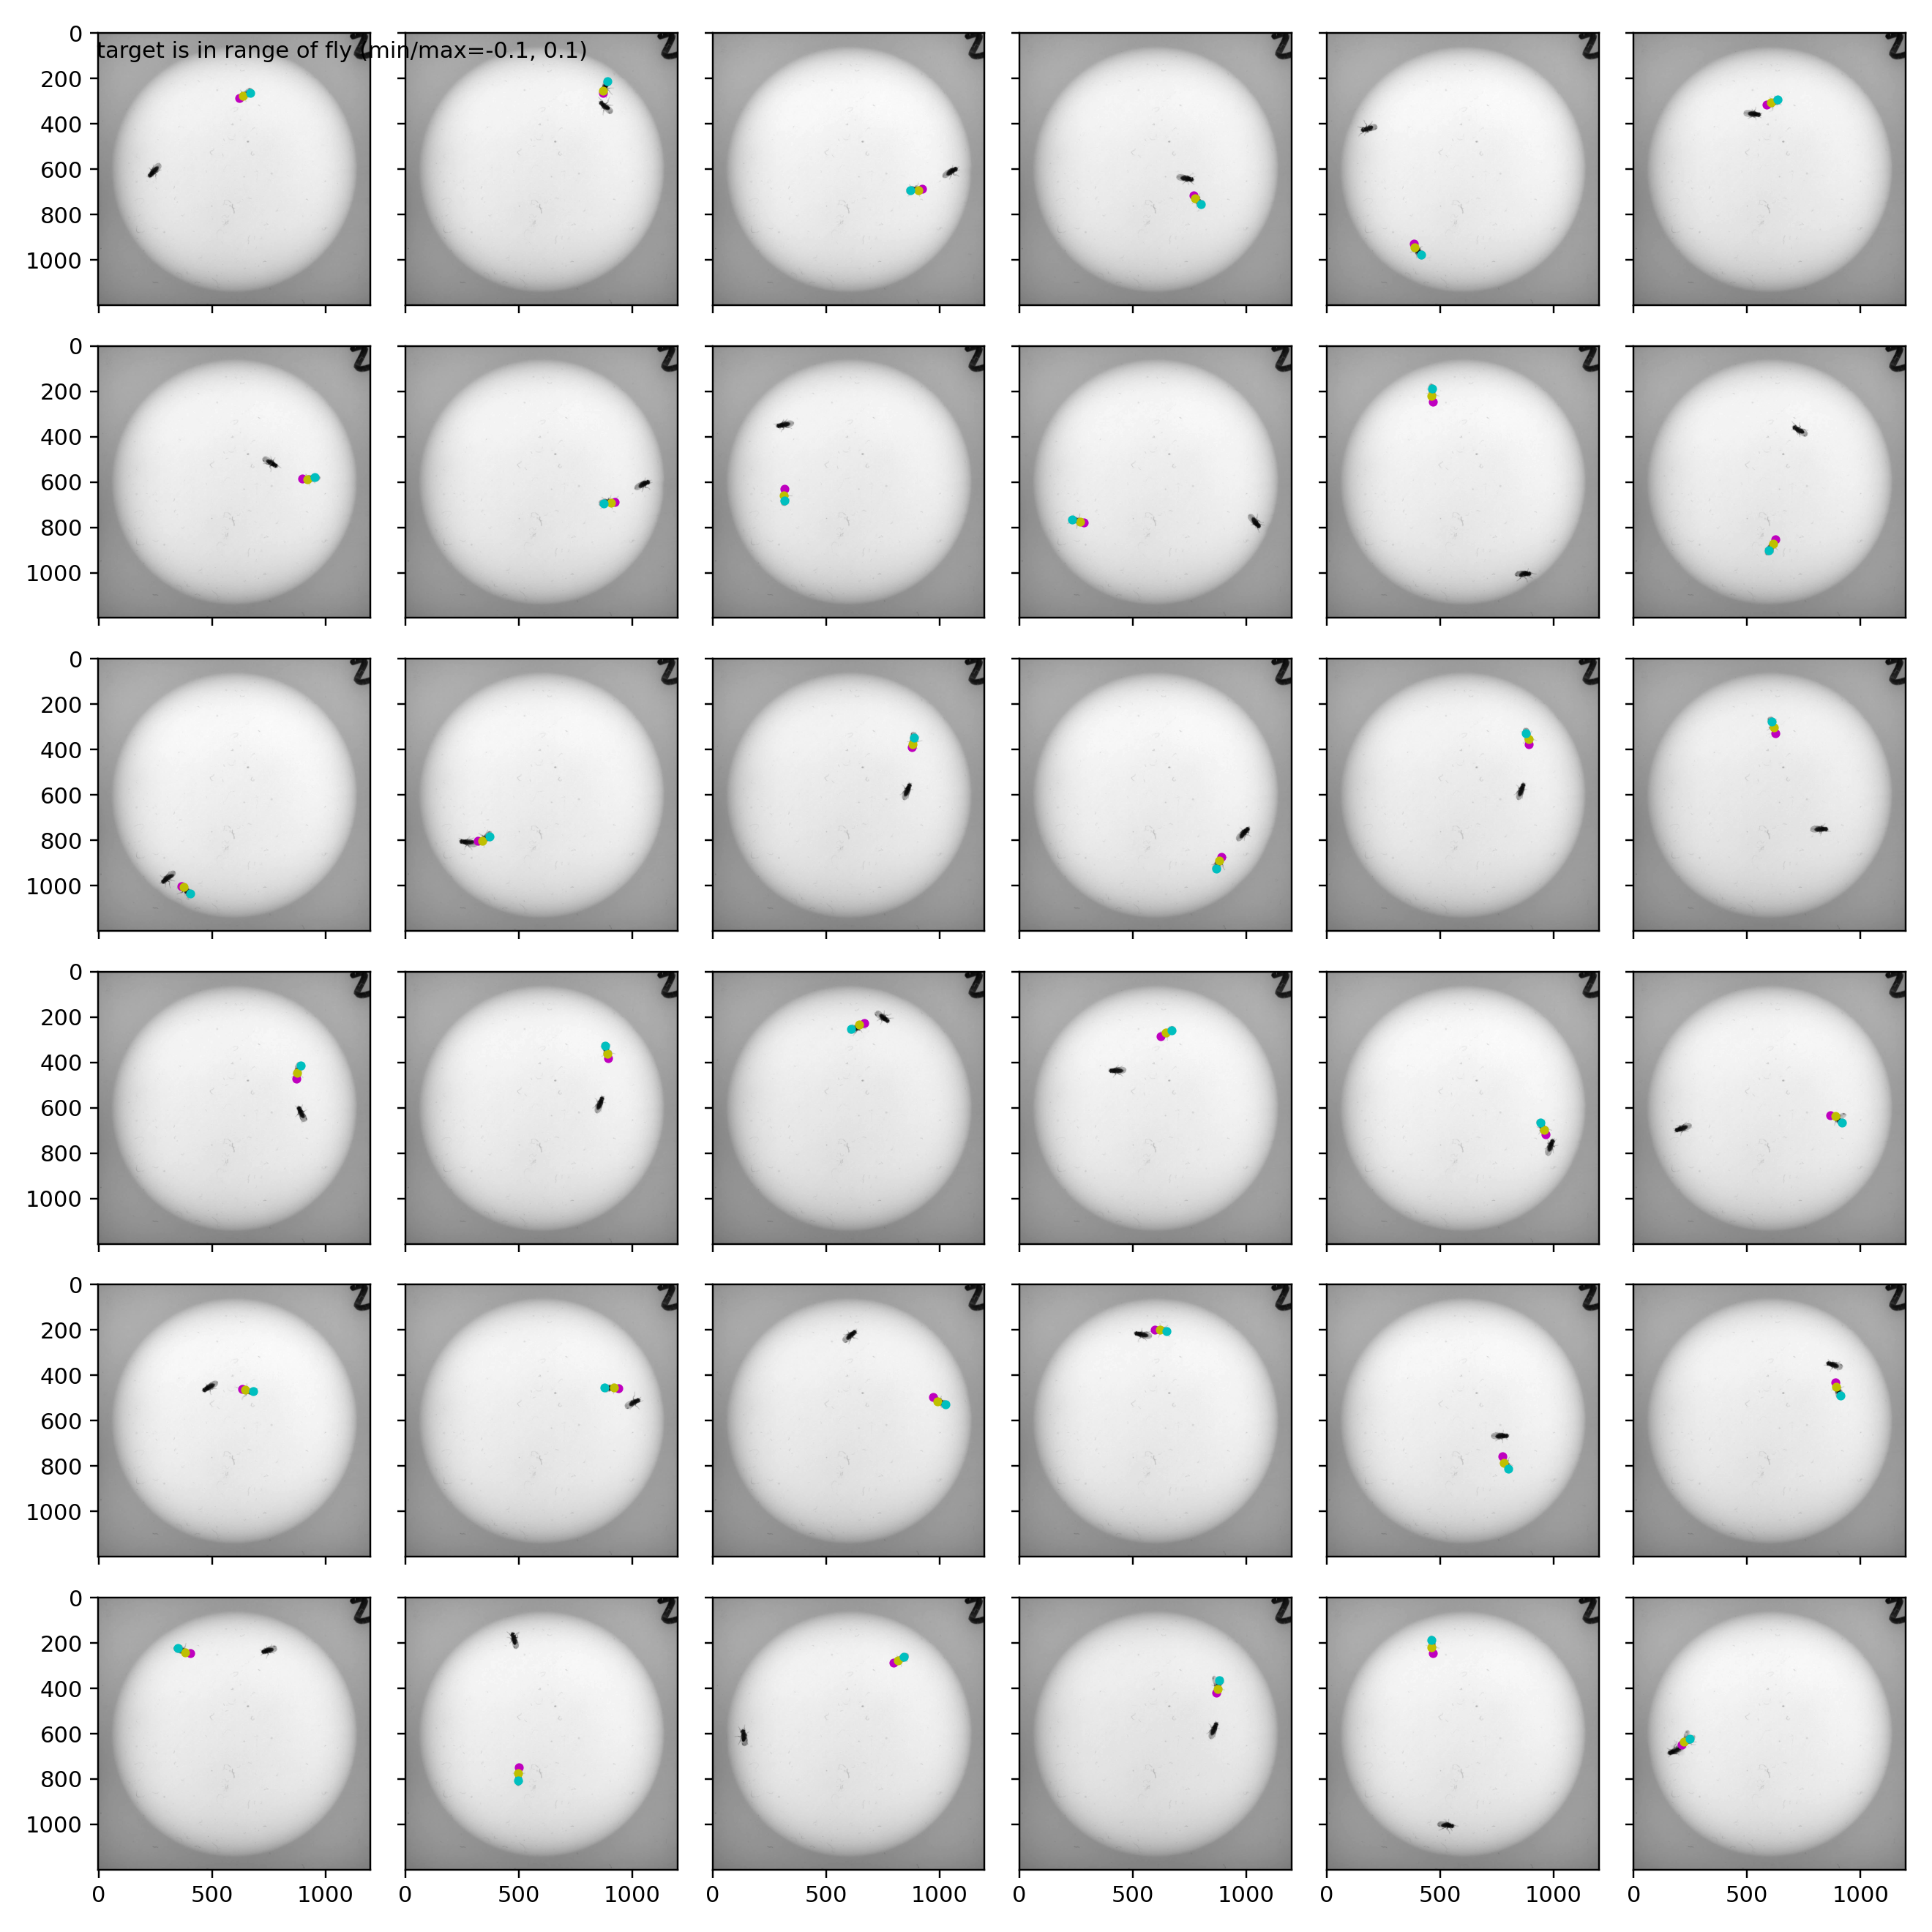

/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/DeepLabCut_38mm-dyad-jyr-2024-02-23/visual_transformations/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/lateral_position_min-0.1_max0.1.png


In [769]:
nr=6
nc=6
fig, axn = pl.subplots(nr, nc, figsize=(12,12), sharex=True, sharey=True)
for ai, i in enumerate(curr_frames):
    if ai>= (nr*nc):
        break
    ax=axn.flat[ai]
    cap.set(1, i)
    ret, im = cap.read()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #COLOR_BGR2RGB)
    ax.imshow(im, cmap='gray')
    plot_bodyparts_by_color(fly1pos, i, bodyparts2plot, colors, ax=ax, pcutoff=0.9,
                    alpha=1.0, markersize=6)
    
fig.text(0.05, 0.97,
        "target is in range of fly (min/max={:.1f}, {:.1f})".format(min_val, max_val))
pl.tight_layout()

figname = 'lateral_position_min{}_max{}'.format(min_val, max_val)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.png'.format(figname)))

# get all fly info

In [770]:
bodylengths = dlc.get_bodypart_distance(fly1pos, 'head', 'abdomentip')
fly_len_mm = 3 # mm
fly_len_pixels = np.nanmean(bodylengths)
mm_per_pix = fly_len_mm / fly_len_pixels
print(mm_per_pix)
#dotrange = dotpos[scorer]['top'][['x', 'y']].max().max()-dotpos[scorer]['top'][['x', 'y']].min().min()
#mm_per_pix = 38.0/dotrange
print(mm_per_pix)

0.05473794452956214
0.05473794452956214


In [771]:
# # load
maledf = dlc.load_trk_df(fpath, flyid='fly1', fps=fps, max_jump=max_jump, cop_ix=None)
femaledf = dlc.load_trk_df(fpath, flyid='fly2', fps=fps, max_jump=max_jump, cop_ix=None)

maledf = maledf.loc[0:cop_ix]
femaledf = femaledf.loc[0:cop_ix]

maledf, femaledf = dlc.get_interfly_params(maledf, femaledf, cop_ix=None)
# dotdf, step_dict = dlc.split_speed_epochs(dotdf, return_stepdict=True,
#                         win=13, cop_ix=None, speed_var='lin_speed_filt',
#                         t_start=20, increment=40, n_levels=10)
# flydf = dlc.add_speed_epoch(flydf, step_dict)
# dotdf = dotdf[dotdf['epoch'] < 10]
# flydf = flydf[flydf['epoch'] < 10]

# convert units
maledf = dlc.convert_df_units(maledf, mm_per_pix)
femaledf = dlc.convert_df_units(femaledf, mm_per_pix)

# make negative left, positive right
female_lateral_positions = female_lateral_positions*-1

/Users/julianarhee/Repositories/flytracker-analysis/dlc.py:186: RuntimeWarning: Mean of empty slice
  
/Users/julianarhee/Repositories/flytracker-analysis/dlc.py:186: RuntimeWarning: Mean of empty slice
  


In [772]:
cop_ix

177300

<IPython.core.display.Javascript object>


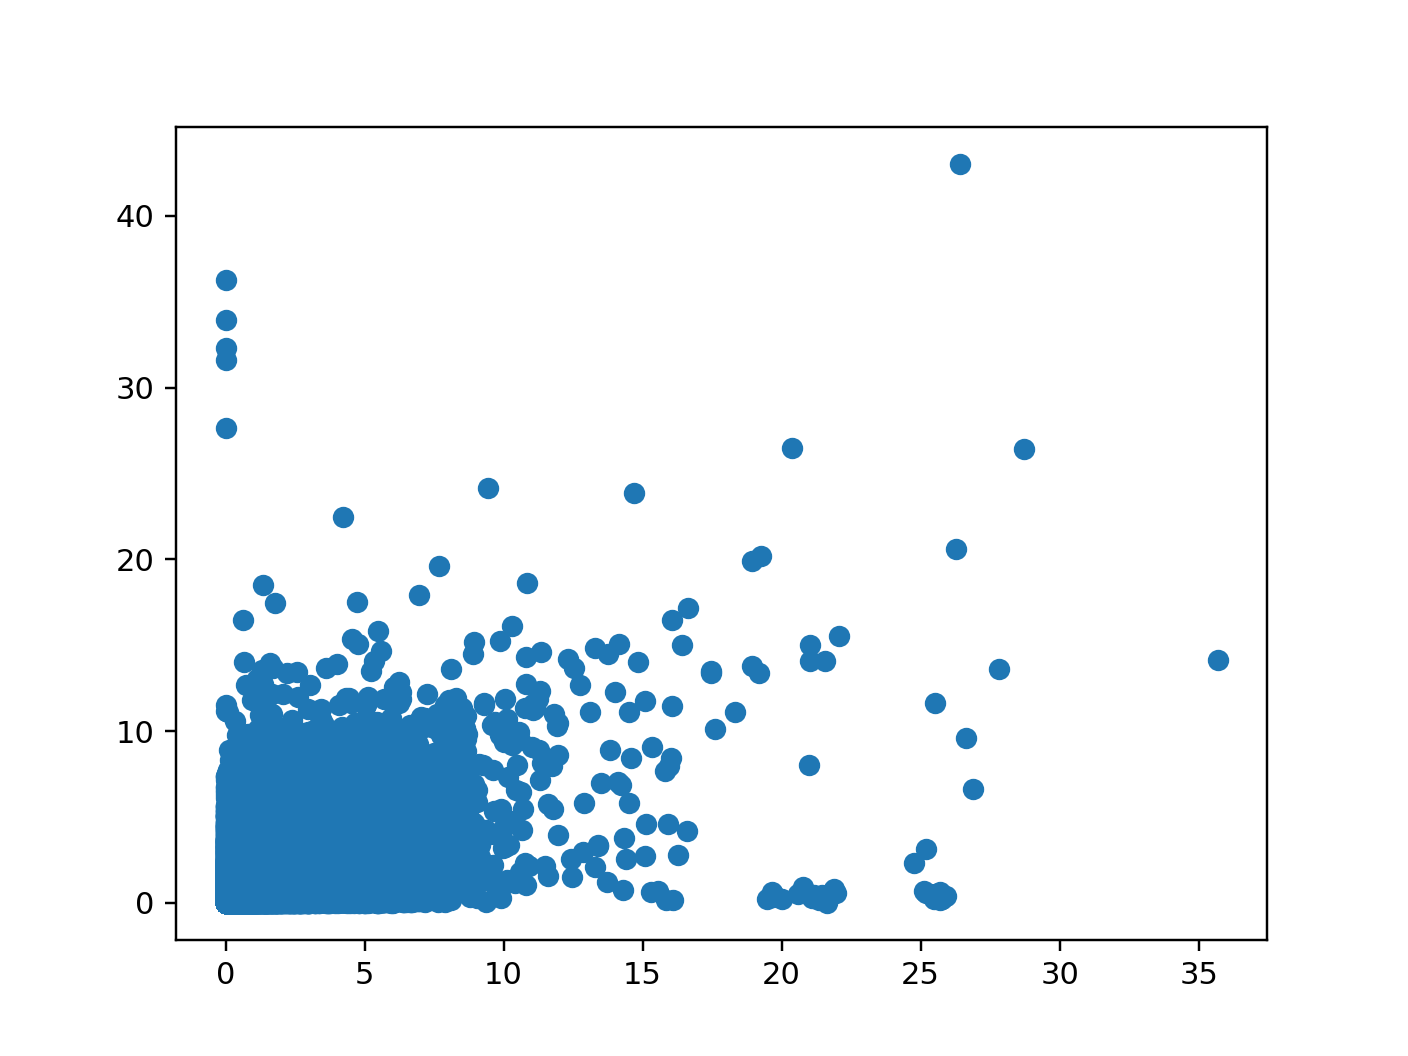

In [773]:
fig, ax = pl.subplots()
ax.scatter(maledf['rel_vel_mms'], maledf['lin_speed_mms'])

In [774]:
female_lateral_positions.shape

(177301,)

In [775]:
maledf.shape

(177301, 16)

<IPython.core.display.Javascript object>


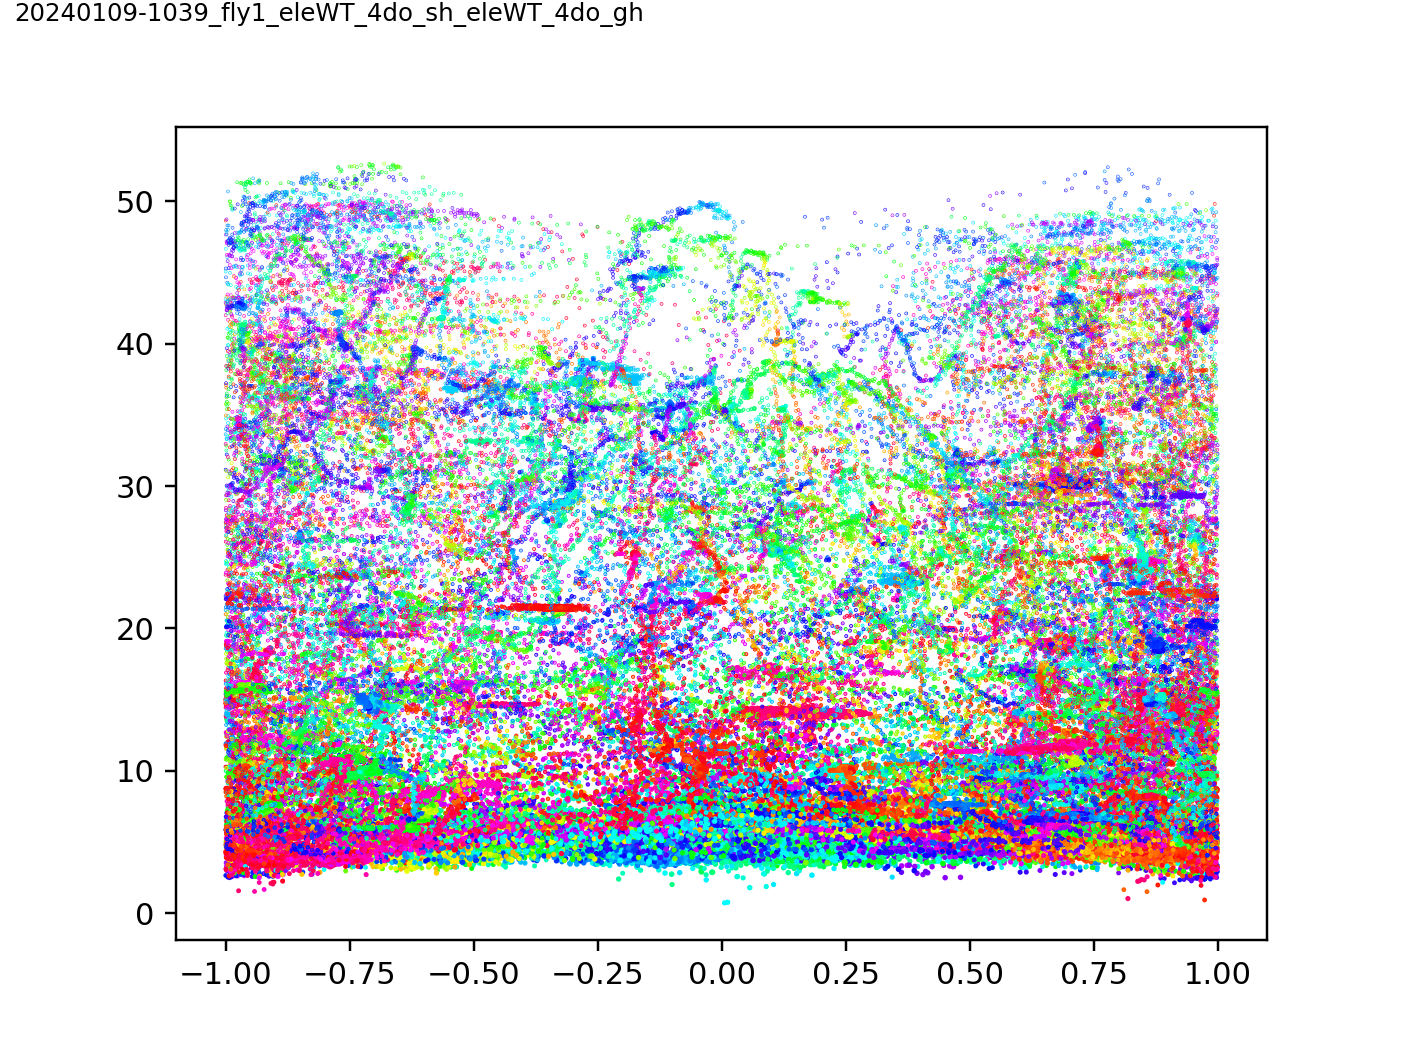

/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/DeepLabCut_38mm-dyad-jyr-2024-02-23/visual_transformations/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/rel_lat-pos-V-dist-mm_hue-ori_sz-widths_20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh.png


In [776]:
fig, ax = pl.subplots() #subplot_kw={'projection': 'polar'})
ax.scatter(female_lateral_positions, maledf['dist_to_other_mm'], 
          s=female_widths, c=female_orientations, cmap='hsv') #np.rad2deg(female_widths))

putil.label_figure(fig, sess_id)
figname = 'rel_lat-pos-V-dist-mm_hue-ori_sz-widths_{}'.format(sess_id)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


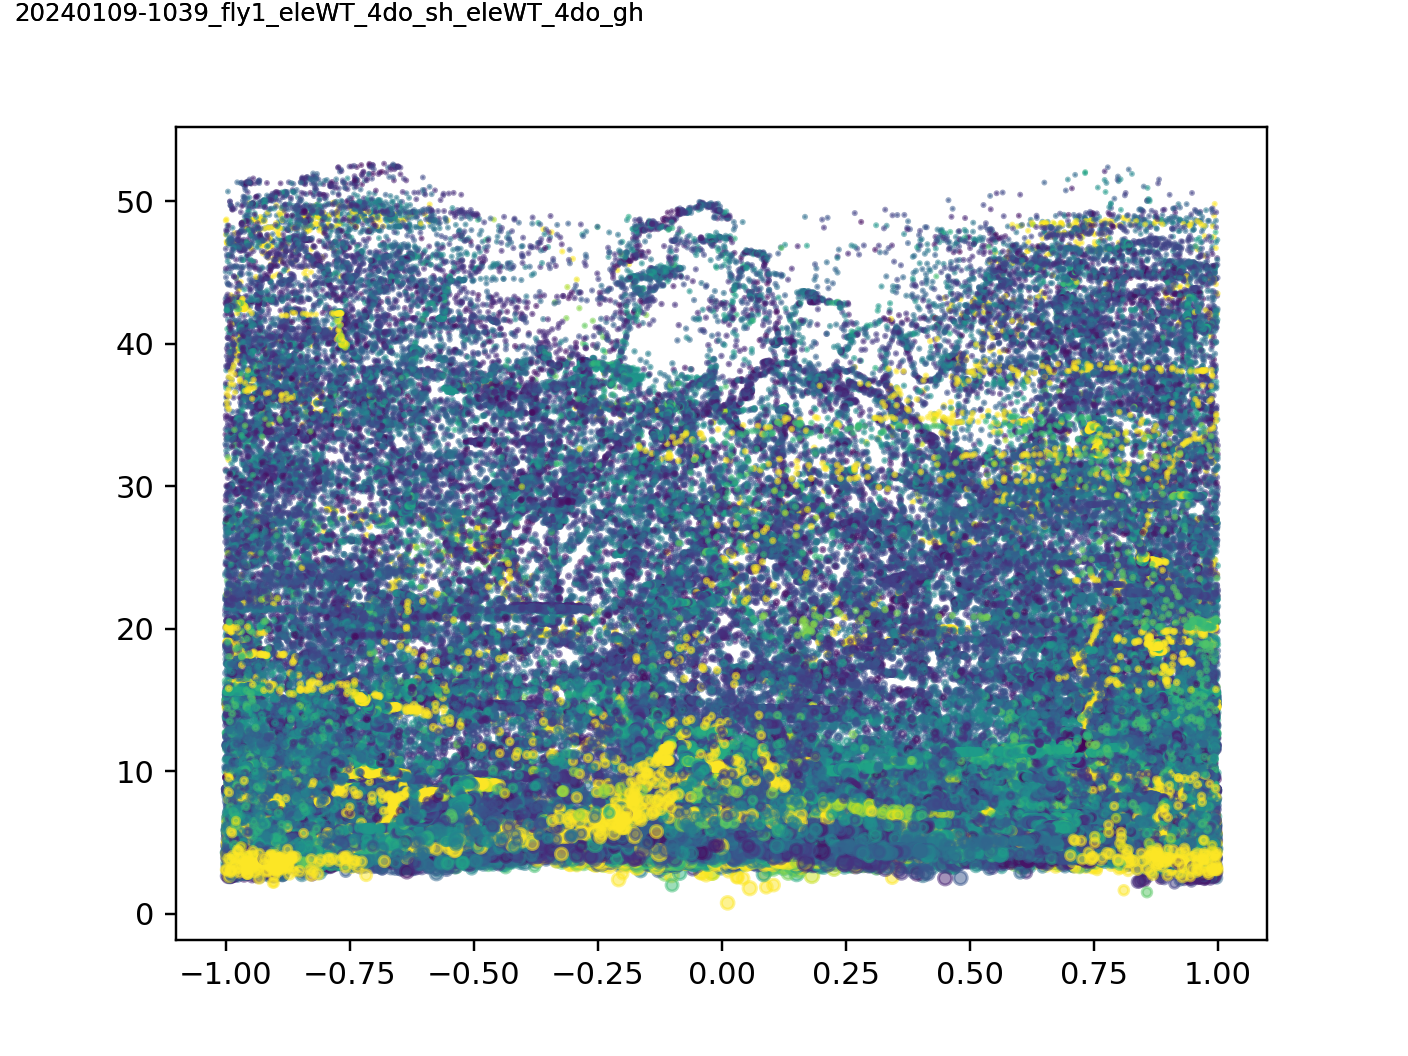

/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/DeepLabCut_38mm-dyad-jyr-2024-02-23/visual_transformations/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/rel_lat-pos-V-dist-mm_hue-interwing_sz-widths_20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh.png


In [777]:
fig, ax = pl.subplots() #subplot_kw={'projection': 'polar'})
ax.scatter(female_lateral_positions, maledf['dist_to_other_mm'], 
          s=np.rad2deg(female_widths)/2, c=maledf['inter_wing_dist'], cmap='viridis',
          vmin=0, vmax=20, alpha=0.5) #np.rad2deg(female_widths))

putil.label_figure(fig, sess_id)
figname = 'rel_lat-pos-V-dist-mm_hue-interwing_sz-widths_{}'.format(sess_id)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.png'.format(figname)))

## plot relative params

In [778]:
maledf['rel_lateral_pos'] = female_lateral_positions
maledf['rel_ang_size'] = female_widths
maledf['rel_ang_size_deg'] = np.rad2deg(female_widths)

<IPython.core.display.Javascript object>


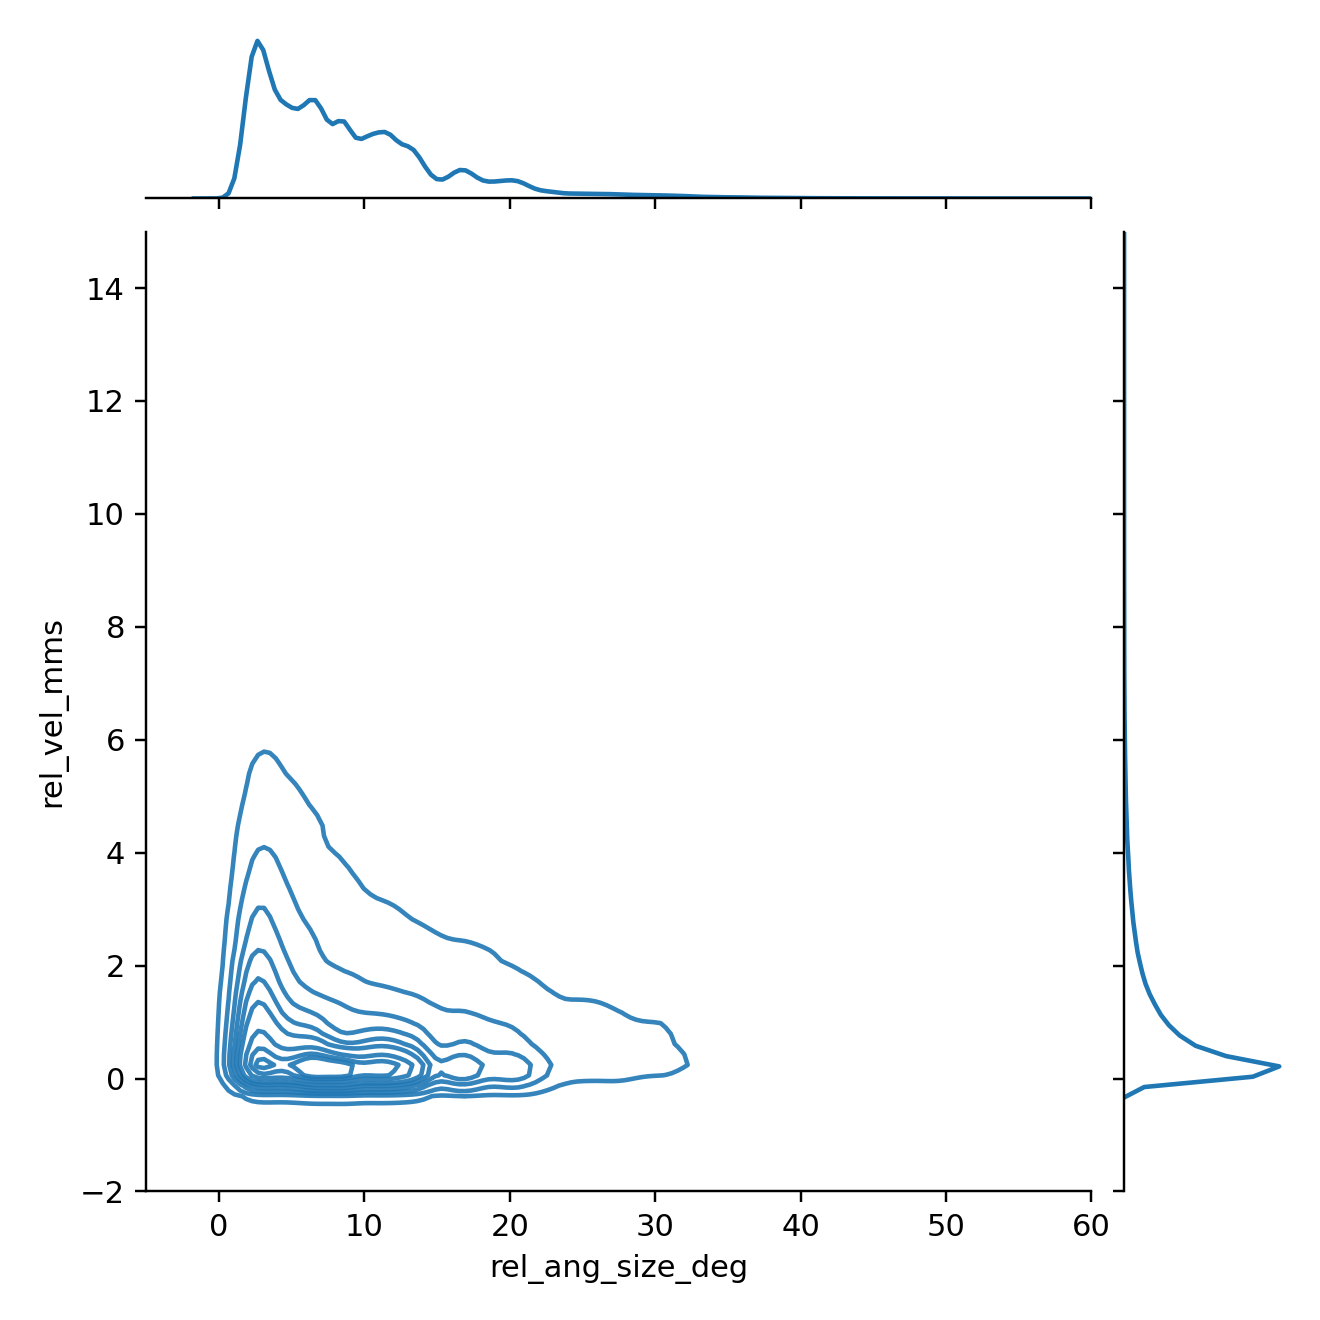

/Users/julianarhee/miniforge3/envs/flytracker/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(


/Volumes/Julie/free-behavior-analysis/38mm-dyad/DeepLabCut/DeepLabCut_38mm-dyad-jyr-2024-02-23/visual_transformations/20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh/jnt_rel_ang_size_deg-V-rel_vel_mms_20240109-1039_fly1_eleWT_4do_sh_eleWT_4do_gh.png


In [779]:
x='rel_ang_size_deg'
y='rel_vel_mms' #''lin_speed' 

g = sns.jointplot(data=maledf, x=x, y=y, #|hue='species', #palette=species_cdict,
              kind='kde', joint_kws={'s': 10, 'alpha': 0.9})
pl.xlim([-5, 60])
pl.ylim([-2, 15])

putil.label_figure(fig, sess_id)
figname = 'jnt_{}-V-{}_{}'.format(x, y, sess_id)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.png'.format(figname)))

In [415]:
sess_id

'20240122-1148-fly3-yakWT_3do_sh_yakWT_3do_gh'

In [ ]:
def calculate_velocity(positions_over_time, time_var='time'):
    movements_over_timesteps = (
        np.roll(positions_over_time, -1, axis=0)
        - positions_over_time)[:-1]

    speeds = np.sqrt(
        movements_over_timesteps.x ** 2 +
        movements_over_timesteps.y ** 2
    ) / movements_over_timesteps[time]

    return pd.DataFrame({
        time: positions_over_time[time][:-1],
        'vel': speeds,
    })

In [ ]:
import math

class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

v1 = Vector(0, 1)
v2 = Vector(0, -1)

v1_theta = math.atan2(v1.y, v1.x)
v2_theta = math.atan2(v2.y, v2.x)

r = (v2_theta - v1_theta) * (180.0 / math.pi)

if r < 0:
    r += 360.0

print r # r % 360 